<center><b><u>METADATA</u></b></center>

<li><b>Data source:</b>
ERA5 hourly data on single levels from 1940 to present

<li><b>Product type:</b>
Monthly averaged reanalysis by hour of day

<li><b>Variable:</b>
Boundary layer height

<li><b>Year:</b>
2024

<li><b>Month:</b>
June

<li><b>Days:</b>
01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30

<li><b>Time:</b>
00:00, 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00

<li><b>Whole available region:</b>
Across Ghana [North 11.5°, West -3.5°, South 0°, East 1.5°]

<li><b>Format:</b>
NetCDF (experimental)

# IMPORTING ALL THE REQUIRED LIBRARIES

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [15]:
data = xr.open_dataset('blh data.nc')

Kumasi_da = data.sel(longitude=slice(-1.5,3.5),latitude=slice(11.5,4.5))
Kumasi_da


<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 29, time: 720)
Coordinates:
  * longitude  (longitude) float32 -1.5 -1.25 -1.0 -0.75 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 11.5 11.25 11.0 10.75 ... 5.25 5.0 4.75 4.5
  * time       (time) datetime64[ns] 2024-06-01 ... 2024-06-30T23:00:00
Data variables:
    blh        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-08 11:59:46 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [24]:
# Extract BLH data for a single location
boundary_layer_height = Kumasi_da['blh'][:, 0, 0]     #data['blh']:it Selects the variable blh from the dataset, #(assumed to be the boundary layer height variable).

#[:, 0, 0]: Selects all time steps (:) for the first latitude (0) and the first longitude (0).
#This assumes the dataset has dimensions in the order of time, latitude, and longitude.



# Convert time to a more readable format 
time = data['time'].values   #data['time'].values: Extracts the time variable from the dataset and converts it into a NumPy array for easier handling.

# Select three different days for plotting
selected_days = np.arange(0, len(time), len(time) // 30)[:30]     
selected_days


array([  0,  24,  48,  72,  96, 120, 144, 168, 192, 216, 240, 264, 288,
       312, 336, 360, 384, 408, 432, 456, 480, 504, 528, 552, 576, 600,
       624, 648, 672, 696])

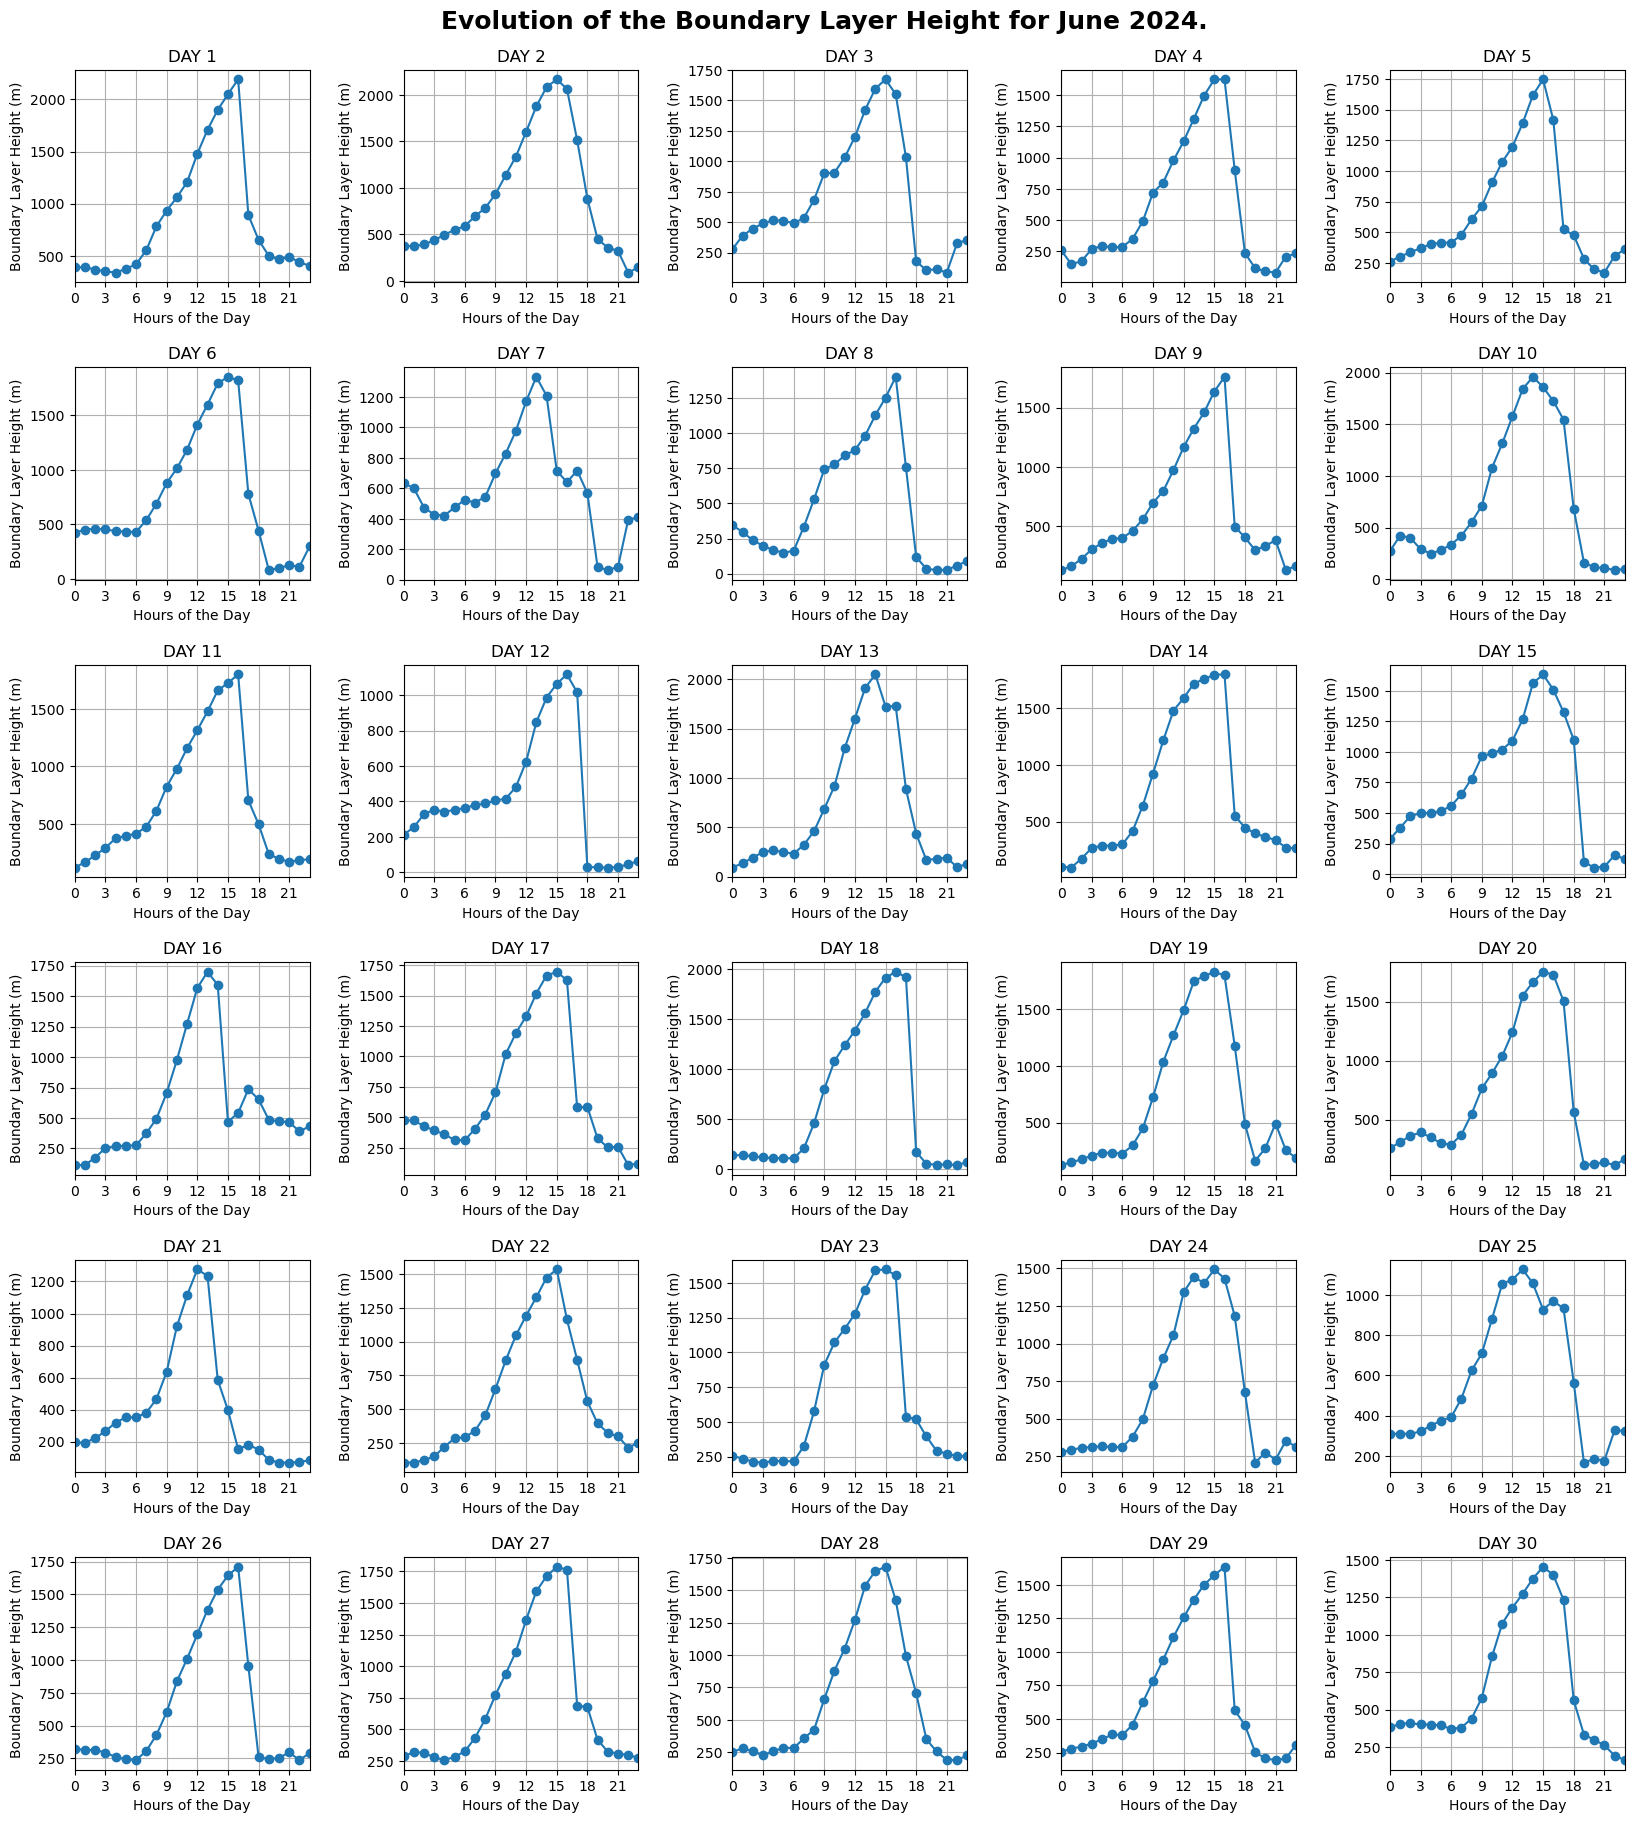

In [41]:
# Plotting
fig, axes = plt.subplots(6,5, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, day in enumerate(selected_days):
    # Extract a 24-hour period, assuming each time step is an hour
    start_idx = day
    end_idx = day + 24
    
    # Check if the end index exceeds the length of the data
    if end_idx > len(boundary_layer_height):
        end_idx = len(boundary_layer_height)
        start_idx = end_idx - 24 if end_idx - 24 >= 0 else 0

    hours = np.arange(0, end_idx - start_idx)
    blh_day = boundary_layer_height[start_idx:end_idx]
    
    ax = axes[i]
    ax.plot(hours, blh_day, marker='o', linestyle='-')
    ax.set_title(f'DAY {i+1}')
    ax.set_xlabel('Hours of the Day')
    ax.set_ylabel('Boundary Layer Height (m)')
    ax.grid(True)
    ax.set_xlim(0, 23)  # Set x-axis limits to show hours from 00:00 to 23:00
    ax.set_xticks(np.arange(0, 24, 3))  # Set x-axis ticks to show every 3 hours

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Evolution of the Boundary Layer Height for June 2024.",ha = 'center',fontsize = 18, weight = 'bold')
fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.95, wspace=0.4, hspace=0.4)
# Adjust layout
# plt.tight_layout()
plt.show()